# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

# **Exploratory Data Analysis - EDA**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.shape

(50000, 14)

In [ ]:
#Identifying continuous and categorical columns in data
df.nunique()

num_passengers             9
sales_channel              2
trip_type                  3
purchase_lead            470
length_of_stay           335
flight_hour               24
flight_day                 7
route                    799
booking_origin           104
wants_extra_baggage        2
wants_preferred_seat       2
wants_in_flight_meals      2
flight_duration           21
booking_complete           2
dtype: int64

In [ ]:
#unique values

df['sales_channel'].unique()
df['trip_type'].unique()
df['flight_day'].unique()
df['wants_extra_baggage'].unique()
df['wants_preferred_seat'].unique()
df['wants_in_flight_meals'].unique()
df['booking_complete'].unique()

array([0, 1])

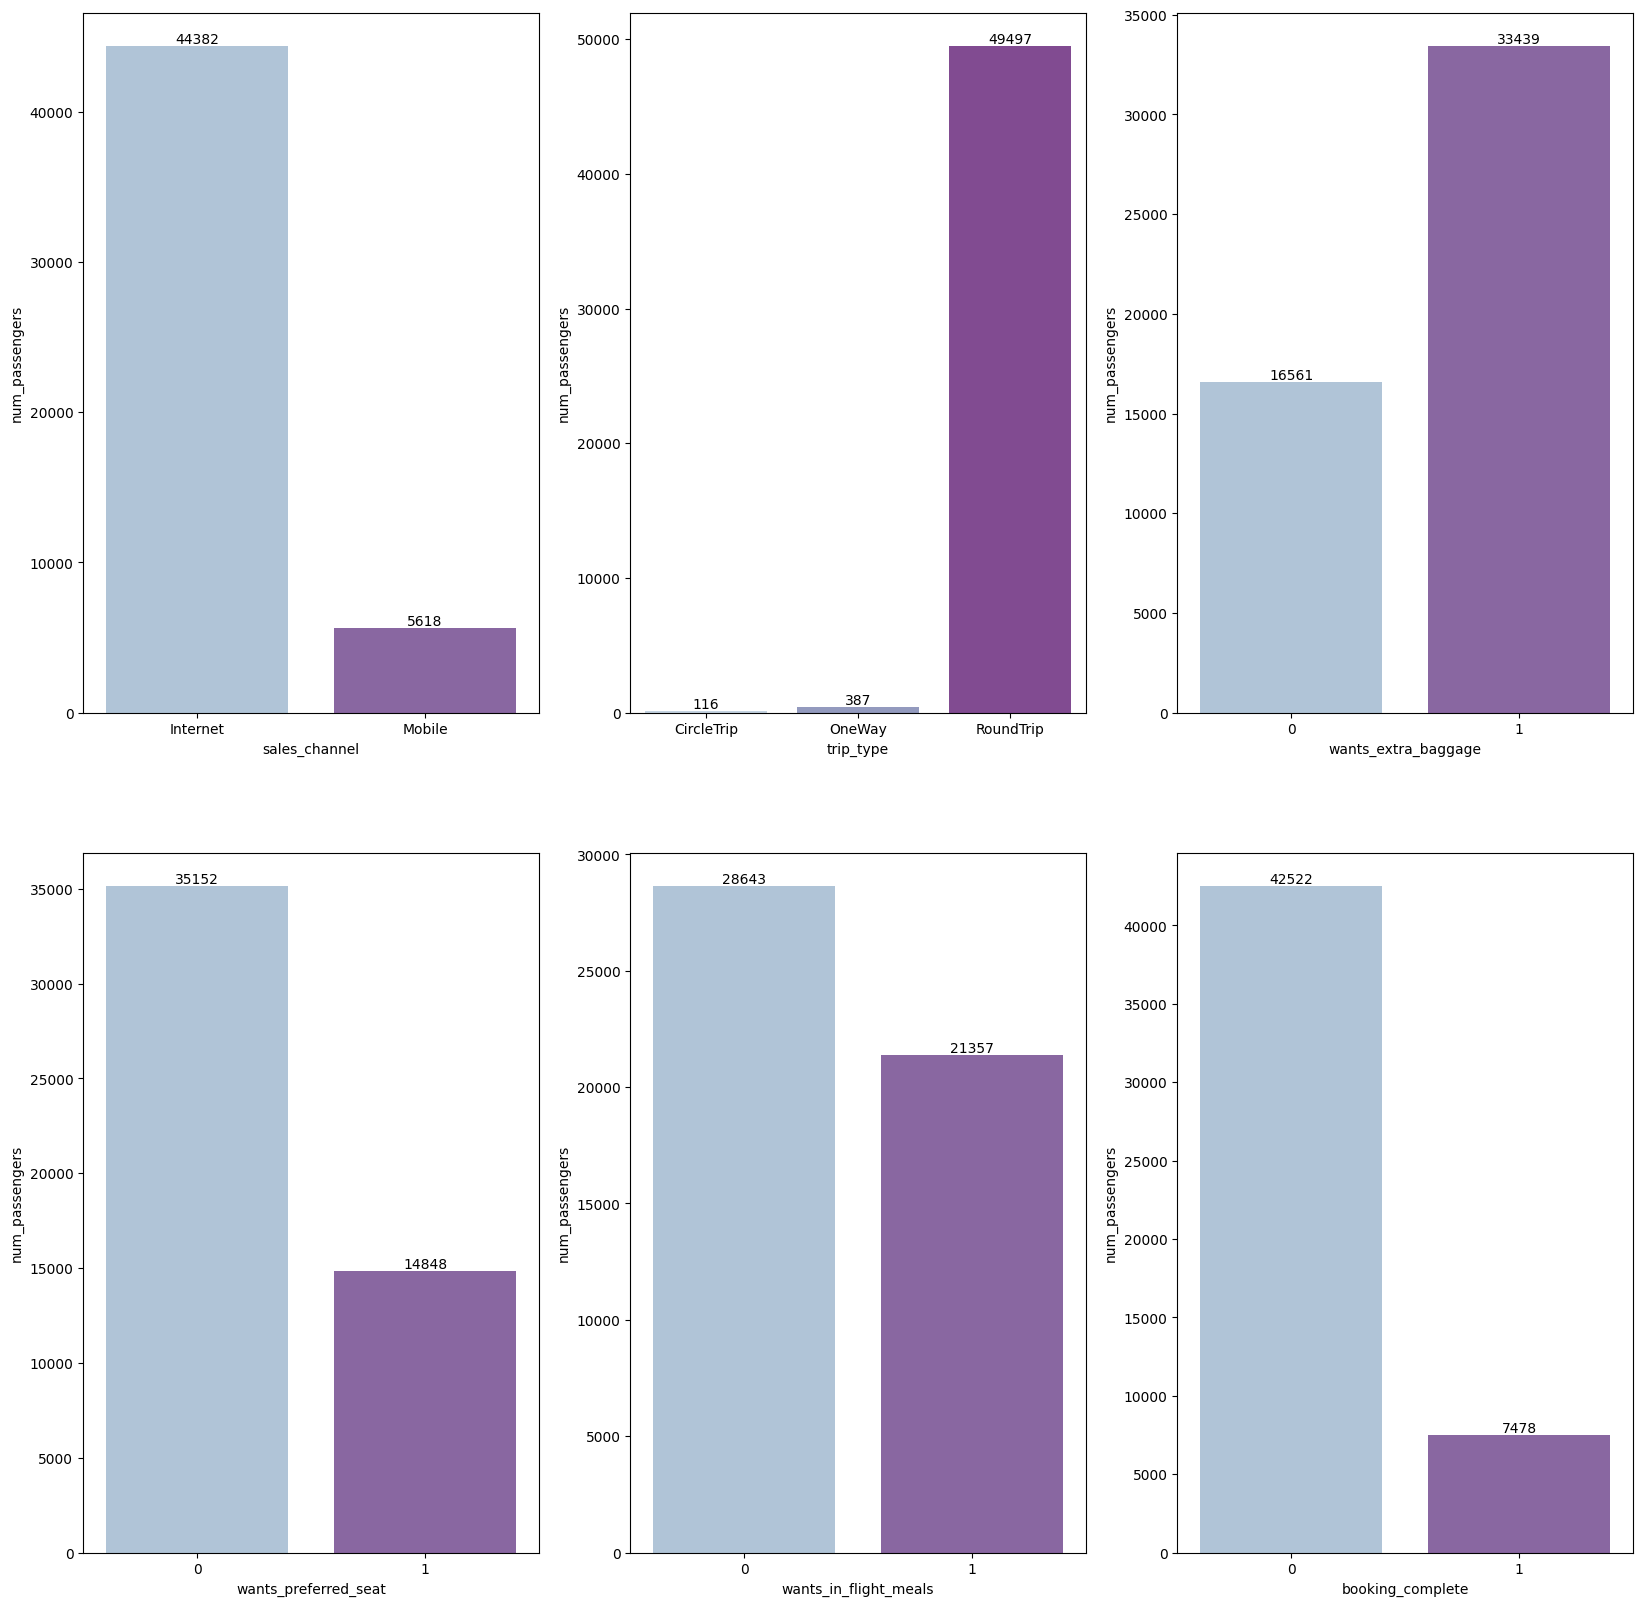

In [ ]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
group = df.groupby('sales_channel')['num_passengers'].count().reset_index()
ax = sns.barplot(data =group, x= 'sales_channel', y= 'num_passengers',palette='BuPu')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,2)
group = df.groupby('trip_type')['num_passengers'].count().reset_index()
ax = sns.barplot(data =group, x= 'trip_type', y= 'num_passengers',palette='BuPu')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,3)
group = df.groupby('wants_extra_baggage')['num_passengers'].count().reset_index()
ax = sns.barplot(data =group, x= 'wants_extra_baggage', y= 'num_passengers',palette='BuPu')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,4)
group = df.groupby('wants_preferred_seat')['num_passengers'].count().reset_index()
ax = sns.barplot(data =group, x= 'wants_preferred_seat', y= 'num_passengers',palette='BuPu')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,5)
group = df.groupby('wants_in_flight_meals')['num_passengers'].count().reset_index()
ax = sns.barplot(data =group, x= 'wants_in_flight_meals', y= 'num_passengers',palette='BuPu')
ax.bar_label(ax.containers[0])

plt.subplot(2,3,6)
group = df.groupby('booking_complete')['num_passengers'].count().reset_index()
ax = sns.barplot(data =group, x= 'booking_complete', y= 'num_passengers',palette='BuPu')
ax.bar_label(ax.containers[0])

plt.show()

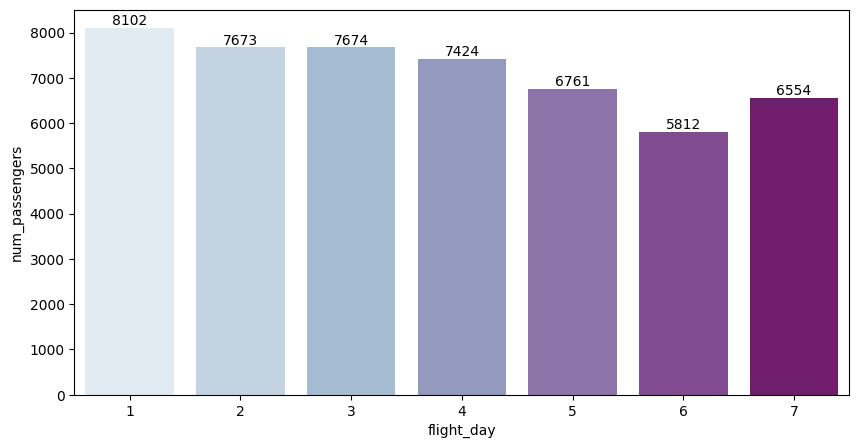

In [ ]:
#number of passengers per day

plt.figure(figsize=(10,5))

group = df.groupby('flight_day')['num_passengers'].count().reset_index()
ax = sns.barplot(data =group, x= 'flight_day', y= 'num_passengers',palette='BuPu')
ax.bar_label(ax.containers[0])

plt.show()

In [ ]:
df_numeric = df.select_dtypes(exclude="object")
df_numeric.shape

(50000, 10)

In [ ]:
df_categoric = df.select_dtypes(include="object")
df_categoric

,sales_channel,trip_type,route,booking_origin
0,Internet,RoundTrip,AKLDEL,New Zealand
1,Internet,RoundTrip,AKLDEL,New Zealand
2,Internet,RoundTrip,AKLDEL,India
3,Internet,RoundTrip,AKLDEL,New Zealand
4,Internet,RoundTrip,AKLDEL,India
...,...,...,...,...
49995,Internet,RoundTrip,PERPNH,Australia
49996,Internet,RoundTrip,PERPNH,Australia
49997,Internet,RoundTrip,PERPNH,Australia
49998,Internet,RoundTrip,PERPNH,Australia


In [ ]:
corr = df.corr()
corr

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,0.015407,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.006986
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.018434,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,-0.006986,0.068139,0.050116,0.026511,-0.106266,1.000000


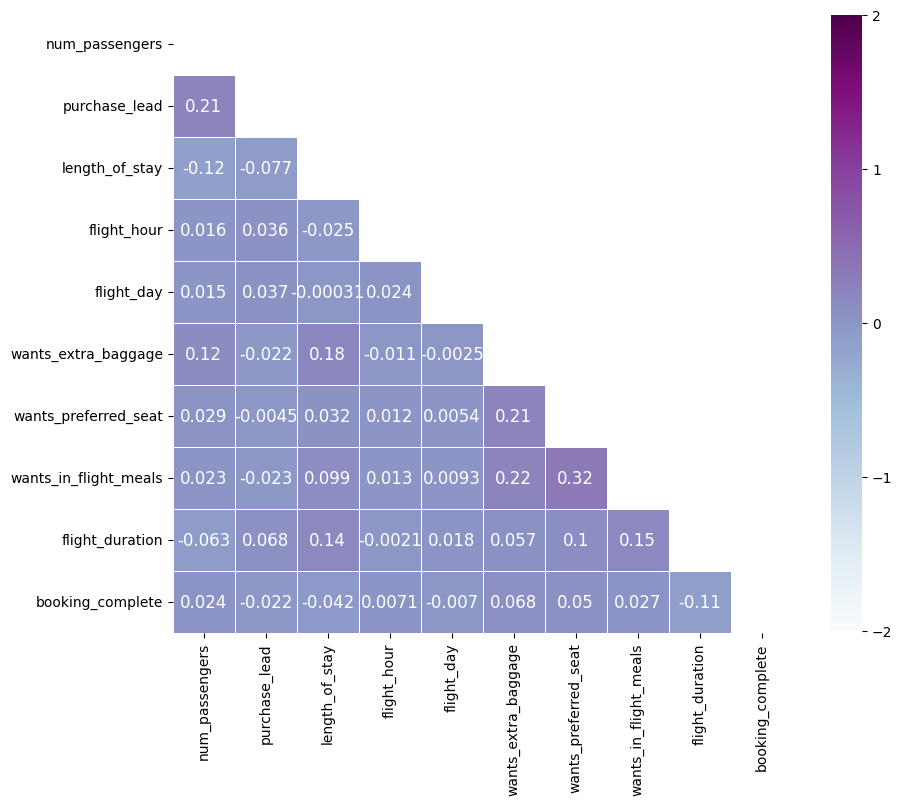

In [ ]:
# Plotting heatmap 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'BuPu',
                      cbar_kws = {'shrink': .8, 
                                "ticks" : [-2, -1, 0, 1, 2]},
                      vmin = -2, 
                      vmax = 2,
                      annot = True,
                      annot_kws = {"size": 12})
# Add the column names as labels
ax.set_yticklabels(corr.columns)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});

[Text(0, 0, '17872'),
 Text(0, 0, '7174'),
 Text(0, 0, '4559'),
 Text(0, 0, '3885'),
 Text(0, 0, '3387'),
 Text(0, 0, '2369'),
 Text(0, 0, '2077'),
 Text(0, 0, '2030'),
 Text(0, 0, '1270'),
 Text(0, 0, '1074')]

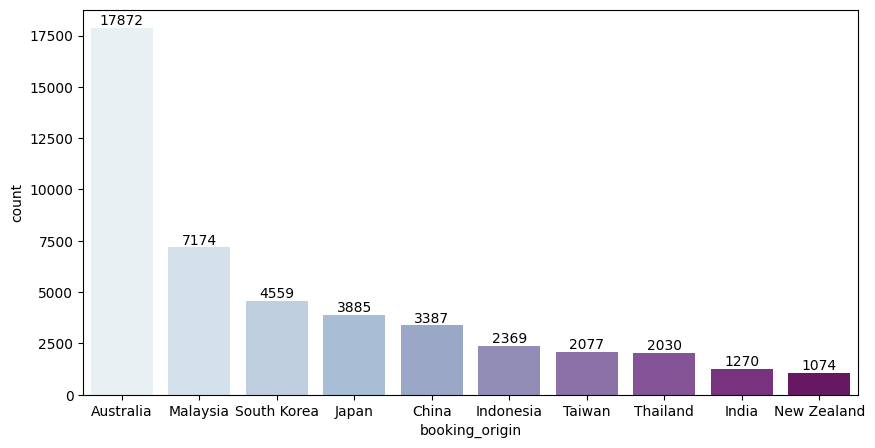

In [ ]:
#top countries in flight bookings
plt.figure(figsize=(10,5))
ax = sns.countplot(x="booking_origin", 
                   data=df ,order=df.booking_origin.value_counts().iloc[:10].index,
                   palette='BuPu')
ax.bar_label(ax.containers[0])  

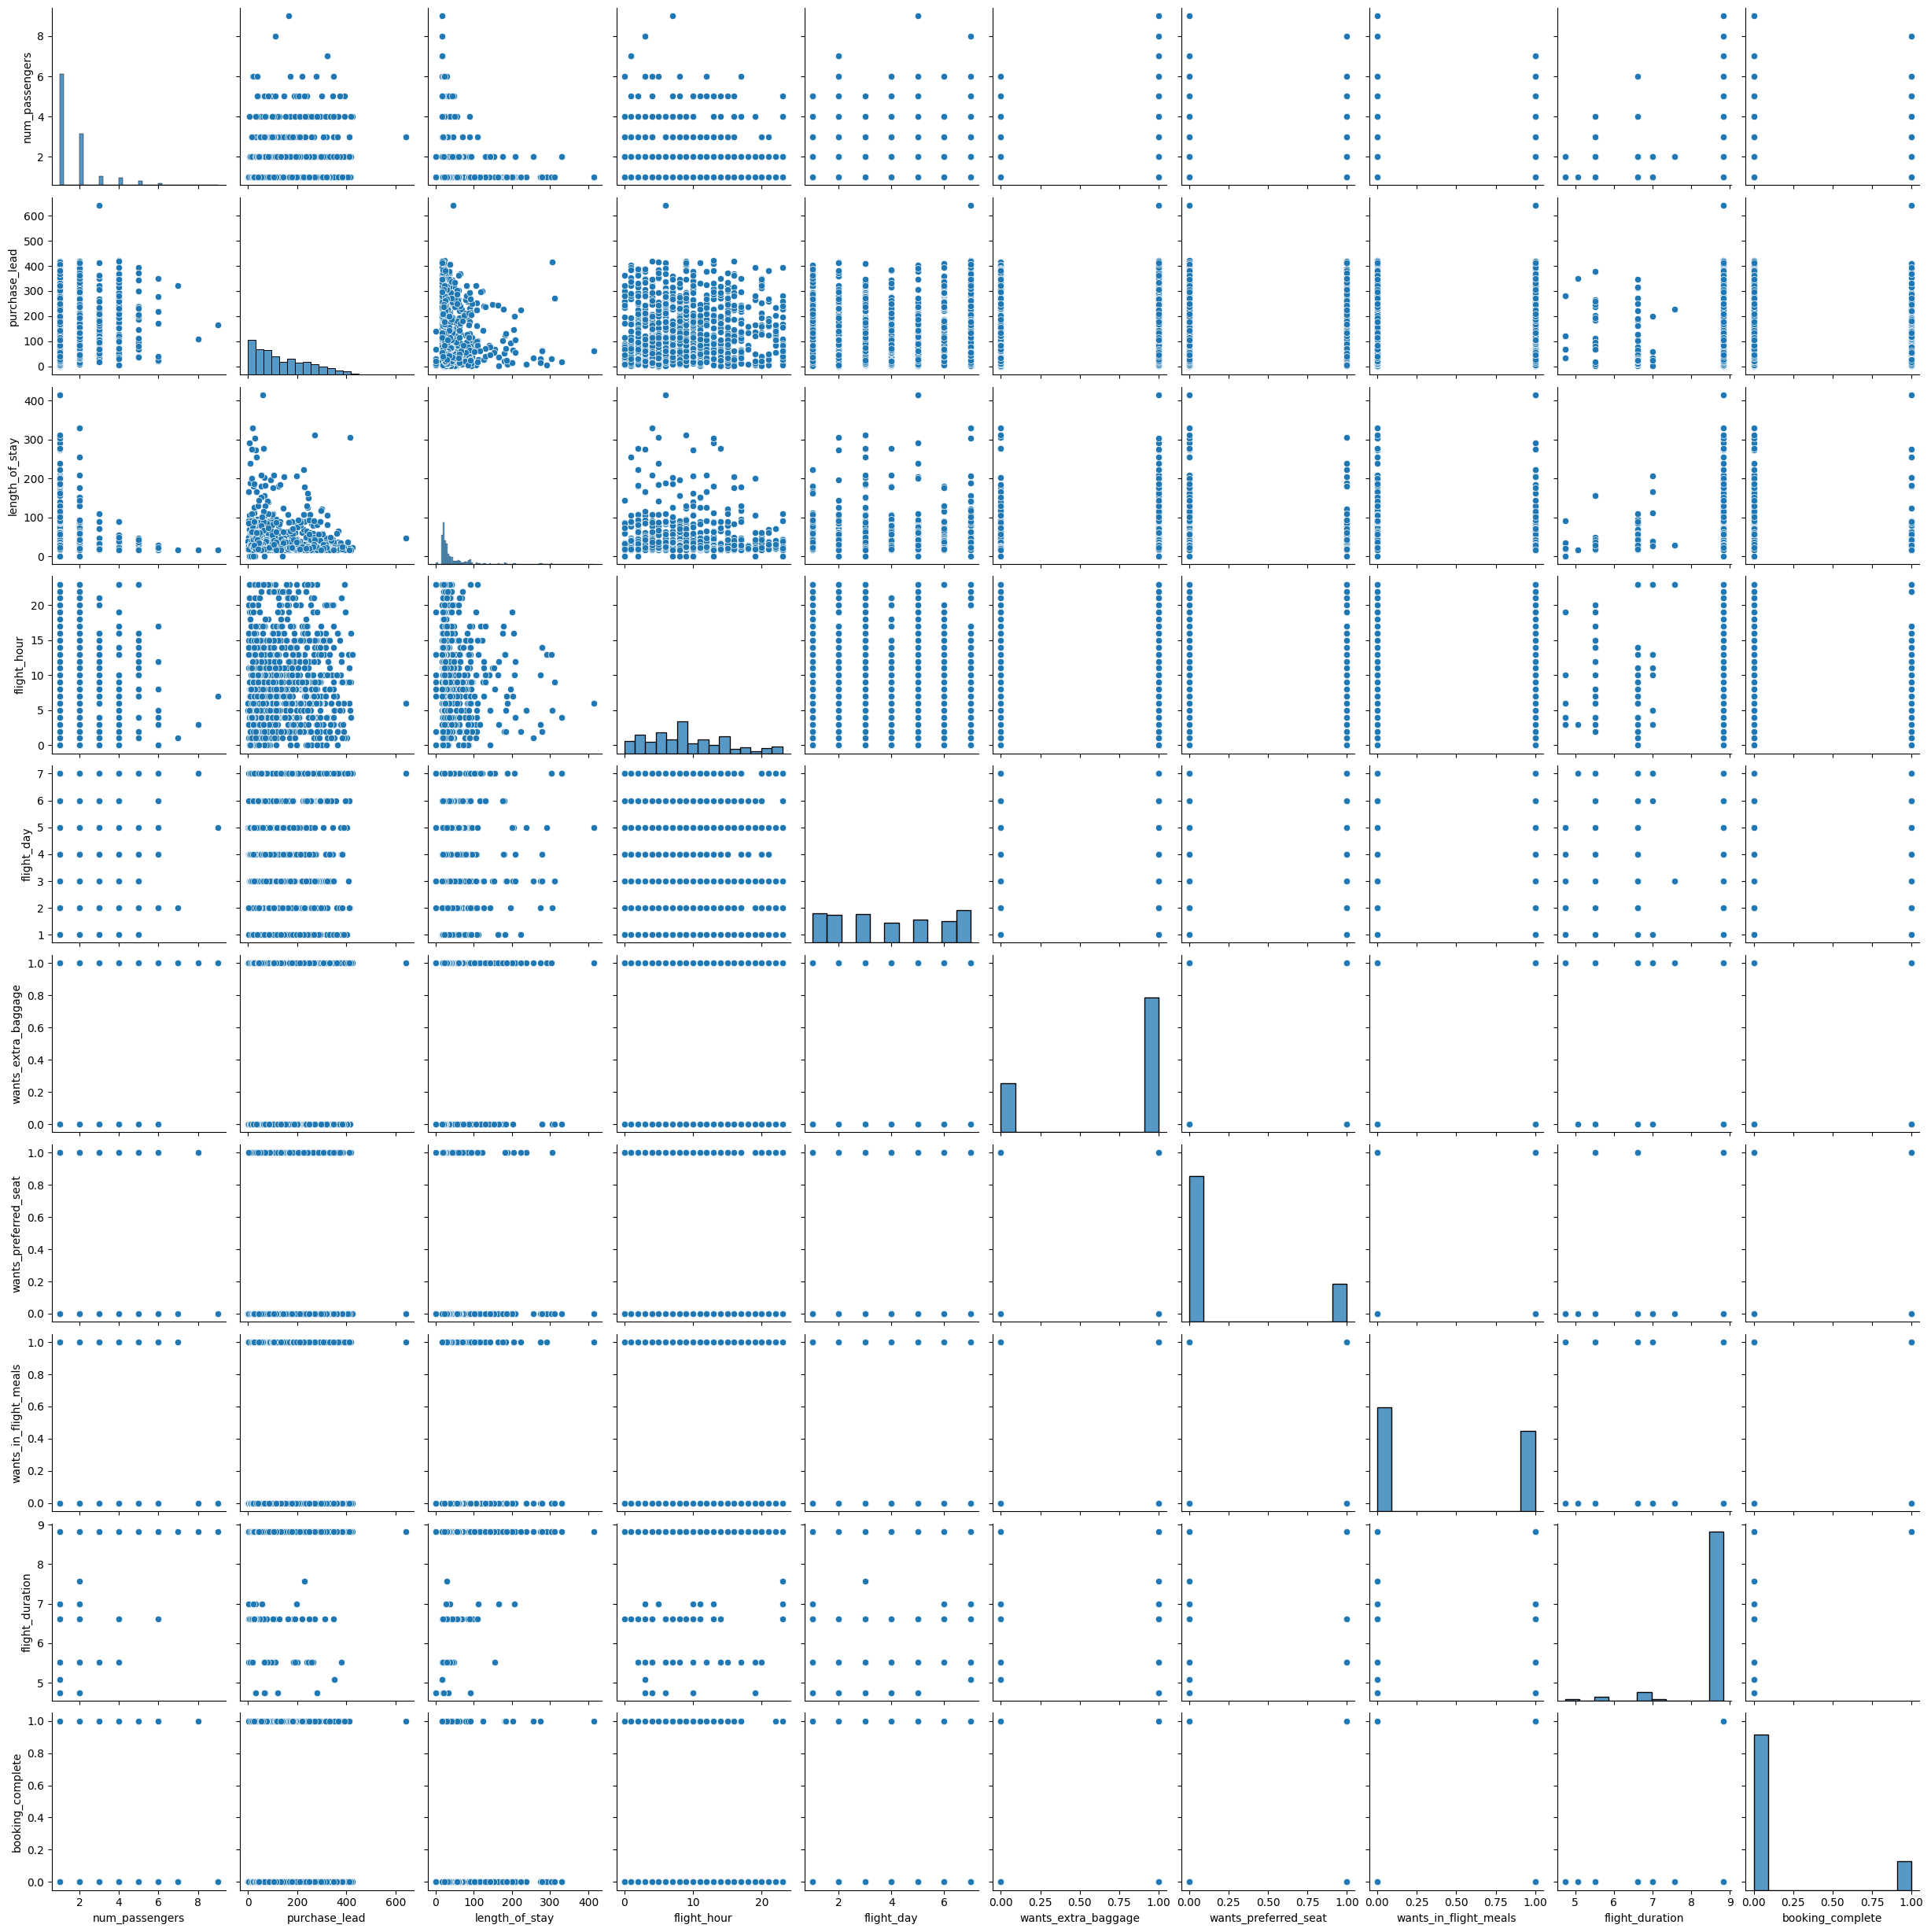

In [ ]:
sns.pairplot(df.head(1000))

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np

In [ ]:
x = df.drop(columns='booking_complete',axis=1)
y = df['booking_complete']

for colname in x.select_dtypes('object'):
  x[colname],_ = x[colname].factorize()
discrete_features = x.dtypes == int

In [ ]:
#Mutual Information
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(x, y, discrete_features)
mi_scores  

route                    0.056972
booking_origin           0.041311
flight_duration          0.018743
wants_preferred_seat     0.004593
length_of_stay           0.004533
wants_in_flight_meals    0.004370
wants_extra_baggage      0.003202
purchase_lead            0.003064
flight_hour              0.001751
trip_type                0.001533
num_passengers           0.001374
sales_channel            0.000936
flight_day               0.000000
Name: MI Scores, dtype: float64

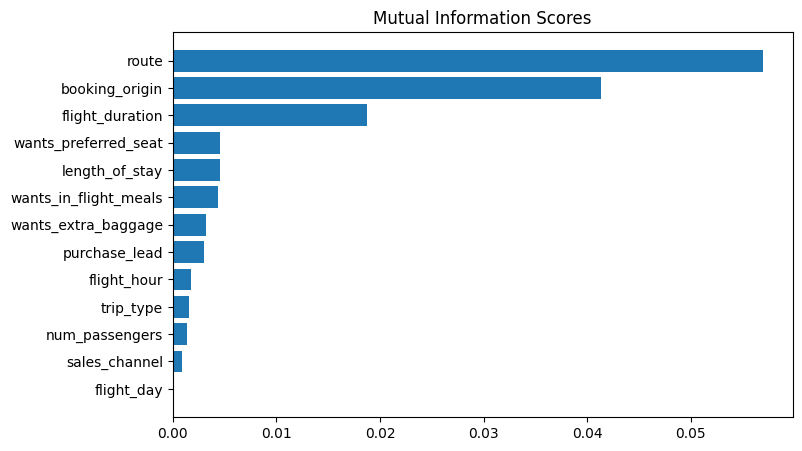

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

**Feature Engineering**

In [ ]:
import matplotlib.pyplot as plt

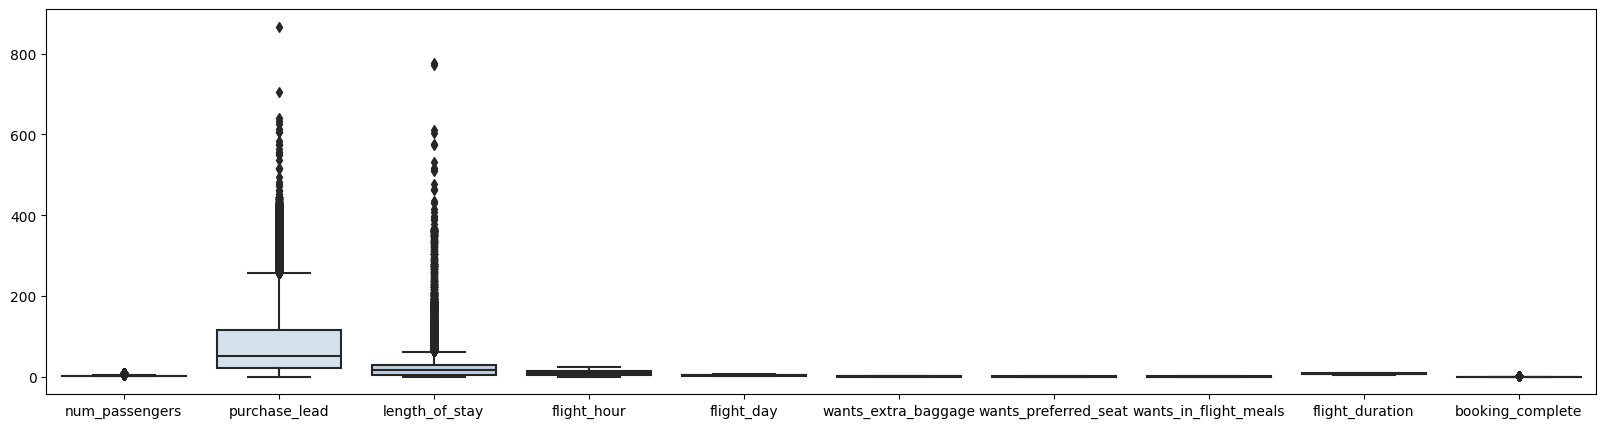

In [ ]:
#outliers values 
plt.figure(figsize=(20,5))
sns.boxplot(data = df_numeric, palette='BuPu')
plt.show()

In [ ]:
numeric_list=['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']
list(numeric_list)

['num_passengers',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

Detecting outliers with IQR method and 
outliers suppression

In [ ]:
#detecting outliers
for variables in numeric_list:
   q1= df_numeric[variables].quantile(.25)
   q3 =df_numeric[variables].quantile(.75)
   med=np.median(df_numeric[variables])
   iqr = q3 - q1
    
   lower_limit = q1 - (1.5 * iqr)
   upper_limit = q3 + (1.5 * iqr)

   outliers=df_numeric.index[(df_numeric[variables]>upper_limit) | (df_numeric[variables]<lower_limit)]

   #outliers suppression
   outliers = (df_numeric[variables] < (lower_limit)) 
   outliers = (df_numeric[variables] > (upper_limit)) 

   df_numeric[outliers] = lower_limit
   df_numeric[outliers] = upper_limit


In [ ]:
df_numeric.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,2.5
1,1.0,112.0,20.0,3.0,6.0,0.0,0.0,0.0,5.52,0.0
2,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,2.5
3,1.0,96.0,31.0,4.0,6.0,0.0,0.0,1.0,5.52,0.0
4,2.0,68.0,22.0,15.0,3.0,1.0,0.0,1.0,5.52,0.0


In [ ]:
df_numeric['booking_complete'].value_counts()

0.0    34282
2.5     9724
1.0     5994
Name: booking_complete, dtype: int64

In [ ]:
val=(df_numeric['booking_complete']==2.5)
df_numeric.loc[val,'booking_complete']=1
df_numeric['booking_complete'].value_counts()

0.0    34282
1.0    15718
Name: booking_complete, dtype: int64

In [ ]:
df_numeric.shape

(50000, 10)

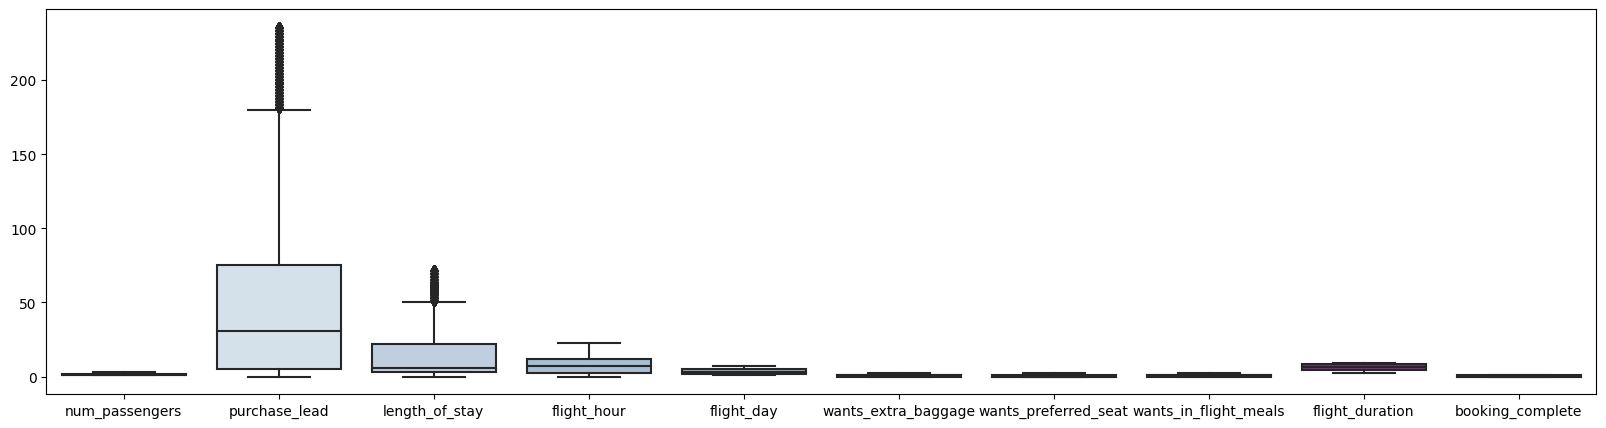

In [ ]:
#trimming outliers boxplot

plt.figure(figsize=(20,5))
sns.boxplot(df_numeric, palette='BuPu')
plt.show()

In [ ]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
df_numeric.shape

(50000, 10)

In [ ]:
df_categoric = df.select_dtypes(include="object")
df_categoric.shape

(50000, 4)

After cleaning out the outliers, we combined the data set we split it into numeric and object.

In [ ]:
df = pd.concat([df_numeric,df_categoric], join='inner', axis =1)
df.shape

(50000, 14)

Here we can find the continent names of the countries and show each in a separate column. Thus, we can see the bookings made according to the continents and made our data set more meaningful.

In [ ]:
#installation
! pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel,trip_type,route,booking_origin
0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,1.0,Internet,RoundTrip,AKLDEL,New Zealand
1,1.0,112.0,20.0,3.0,6.0,0.0,0.0,0.0,5.52,0.0,Internet,RoundTrip,AKLDEL,New Zealand
2,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,1.0,Internet,RoundTrip,AKLDEL,India
3,1.0,96.0,31.0,4.0,6.0,0.0,0.0,1.0,5.52,0.0,Internet,RoundTrip,AKLDEL,New Zealand
4,2.0,68.0,22.0,15.0,3.0,1.0,0.0,1.0,5.52,0.0,Internet,RoundTrip,AKLDEL,India


In [ ]:
#function to convert to alpah2 country codes and continents
import pycountry_convert as pc

df['booking_origin'] =  df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')
df['booking_origin'] =  df['booking_origin'].replace('Svalbard & Jan Mayen', 'Svalbard')

def get_continent(col):         
    try:
        cn_a2_code =  pc.country_name_to_country_alpha2(col.booking_origin, cn_name_format="default")
        cn_continent = pc.country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return (cn_continent)

df['booking_continent']=df.apply(get_continent,axis=1)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel,trip_type,route,booking_origin,booking_continent
0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,1.0,Internet,RoundTrip,AKLDEL,New Zealand,OC
1,1.0,112.0,20.0,3.0,6.0,0.0,0.0,0.0,5.52,0.0,Internet,RoundTrip,AKLDEL,New Zealand,OC
2,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,1.0,Internet,RoundTrip,AKLDEL,India,AS
3,1.0,96.0,31.0,4.0,6.0,0.0,0.0,1.0,5.52,0.0,Internet,RoundTrip,AKLDEL,New Zealand,OC
4,2.0,68.0,22.0,15.0,3.0,1.0,0.0,1.0,5.52,0.0,Internet,RoundTrip,AKLDEL,India,AS


In [ ]:
df['booking_continent'].value_counts()

In [ ]:
continent=pd.get_dummies(df['booking_continent'], prefix='booking_continent')
df=pd.concat([df,continent],axis=1)
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,...,route,booking_origin,booking_continent,booking_continent_AF,booking_continent_AS,booking_continent_EU,booking_continent_NA,booking_continent_OC,booking_continent_SA,booking_continent_Unknown
0,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,1.0,...,AKLDEL,New Zealand,OC,0,0,0,0,1,0,0
1,1.0,112.0,20.0,3.0,6.0,0.0,0.0,0.0,5.52,0.0,...,AKLDEL,New Zealand,OC,0,0,0,0,1,0,0
2,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.5,2.50,1.0,...,AKLDEL,India,AS,0,1,0,0,0,0,0
3,1.0,96.0,31.0,4.0,6.0,0.0,0.0,1.0,5.52,0.0,...,AKLDEL,New Zealand,OC,0,0,0,0,1,0,0
4,2.0,68.0,22.0,15.0,3.0,1.0,0.0,1.0,5.52,0.0,...,AKLDEL,India,AS,0,1,0,0,0,0,0


In [ ]:
df['booking_complete'].value_counts()

0.0    34282
1.0    15718
Name: booking_complete, dtype: int64

In [ ]:
df.dtypes

num_passengers               float64
purchase_lead                float64
length_of_stay               float64
flight_hour                  float64
flight_day                   float64
wants_extra_baggage          float64
wants_preferred_seat         float64
wants_in_flight_meals        float64
flight_duration              float64
booking_complete             float64
sales_channel                 object
trip_type                     object
route                         object
booking_origin                object
booking_continent             object
booking_continent_AF           uint8
booking_continent_AS           uint8
booking_continent_EU           uint8
booking_continent_NA           uint8
booking_continent_OC           uint8
booking_continent_SA           uint8
booking_continent_Unknown      uint8
dtype: object

In [ ]:
df['route'].value_counts()
df.drop('route',axis=1, inplace=True)

In [ ]:
#converting categorical columns to numeric columns
#Label Encoding
from sklearn import preprocessing  
label_encoder = preprocessing.LabelEncoder()
df['sales_channel']= label_encoder.fit_transform(df['sales_channel'])
df['trip_type']= label_encoder.fit_transform(df['trip_type'])
df['booking_origin']= label_encoder.fit_transform(df['booking_origin']) 
df['booking_continent']= label_encoder.fit_transform(df['booking_continent']) 

In [ ]:
df.dtypes

num_passengers               float64
purchase_lead                float64
length_of_stay               float64
flight_hour                  float64
flight_day                   float64
wants_extra_baggage          float64
wants_preferred_seat         float64
wants_in_flight_meals        float64
flight_duration              float64
booking_complete             float64
sales_channel                  int64
trip_type                      int64
booking_origin                 int64
booking_continent              int64
booking_continent_AF           uint8
booking_continent_AS           uint8
booking_continent_EU           uint8
booking_continent_NA           uint8
booking_continent_OC           uint8
booking_continent_SA           uint8
booking_continent_Unknown      uint8
dtype: object

get lon and lat 
https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10 



**Train Machine learning model**

***Model 1 : Random Forest Classifier with All Features***

(used 10 and 100 decision-trees to build the model)


In [ ]:
#col= ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

In [ ]:
#Using StandardScaler for feature scaling

#from sklearn.preprocessing import StandardScaler

#def scale(X):
  #  scaler = StandardScaler()
   # scaler.fit(X)
   # return X

In [ ]:
#split
y=df['booking_complete']
X=df.drop('booking_complete',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1) 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)  

In [ ]:
#declare feature vector and targer variable
#split data into separate training and test set
#from sklearn.model_selection import train_test_split
#X= df[col]
#X= scale(X)
#y= df.booking_complete    



In [ ]:
y_train.value_counts()

0.0    23995
1.0    11005
Name: booking_complete, dtype: int64

In [ ]:
X_train.shape, X_test.shape

((35000, 20), (15000, 20))

In [ ]:
#! pip install --upgrade category_encoders

In [ ]:
# import category encoders
#import category_encoders as ce

In [ ]:
# encode categorical variables with ordinal encoding

#encoder = ce.OrdinalEncoder(cols=['sales_channel', 'trip_type', 'route', 'booking_origin', 'booking_continent'])

#X_train = encoder.fit_transform(X_train)
#X_test = encoder.transform(X_test)

In [ ]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)

In [ ]:
# Model Building
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier()

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Accuracy on training set: {0:0.4f}'.format(rfc.score(X_train, y_train)))


Model accuracy score: 0.8791
Accuracy on training set: 0.9998


In [ ]:
#Random Forest Classifier model with parameter n_estimators=100 

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))
print('Accuracy on training set: {0:0.4f}'.format(rfc.score(X_train, y_train)))

Model accuracy score with 100 decision-trees : 0.8805
Accuracy on training set: 0.9998


In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

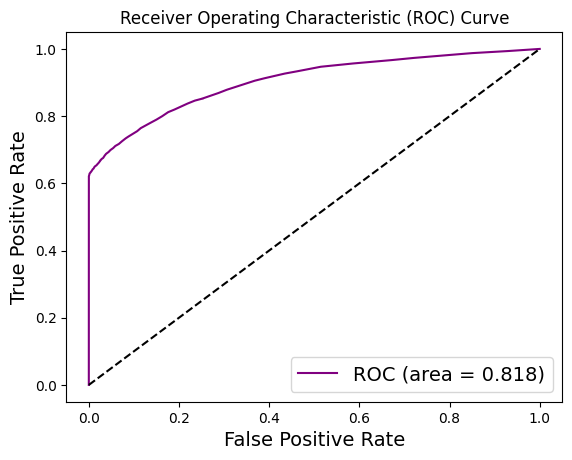

In [ ]:
# Building ROC curve
rf_roc_auc = roc_auc_score(y_test, rfc_100.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc_100.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='purple', label='ROC (area = %0.3f)'  % rf_roc_auc )
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 2.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right", fontsize=14)
plt.show();

***Model 2 : Random Forest Classifier with Top 5 Features***

(used 10 and 100 decision-trees to build the model)

In [ ]:
 #Random Forest Classifier with Top 5 features

features=['booking_origin','length_of_stay','flight_duration', 'purchase_lead']
x1= df[features]
y = df['booking_complete']

X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y, test_size=0.3, random_state=42)


In [ ]:
# encode categorical variables with ordinal encoding

#encoder = ce.OrdinalEncoder(cols=['route', 'booking_origin'])

#X_train1 = encoder.fit_transform(X_train1)
#X_test1 = encoder.transform(X_test1)

In [ ]:
# Model Building
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc1 = RandomForestClassifier(random_state=0)

# fit the model
rfc1.fit(X_train1, y_train1)

# Predict the Test set results
y_pred1 = rfc1.predict(X_test1)

# Check accuracy score 
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test1, y_pred1)))
print('Accuracy on training set:  {0:0.4f}'.format(rfc.score(X_train, y_train)))

Model accuracy score: 0.8573
Accuracy on training set:  0.9998


In [ ]:
#Random Forest Classifier model with parameter n_estimators=100 

rfc1_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc1_100.fit(X_train1, y_train1)

# Predict on the test set results
y_pred1_100 = rfc1_100.predict(X_test1)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test1, y_pred1_100)))
print('Accuracy on training set: {0:0.4f}'.format(rfc1_100.score(X_train1, y_train1)))

Model accuracy score with 100 decision-trees : 0.8573
Accuracy on training set: 0.9692


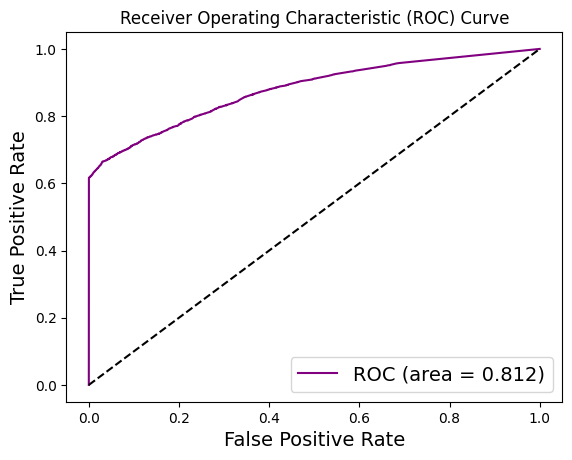

In [ ]:
# Building ROC curve
rf_roc_auc = roc_auc_score(y_test1, rfc1_100.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, rfc1_100.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='purple', label='ROC (area = %0.3f)'  % rf_roc_auc )
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right", fontsize=14)
plt.show();

**Find Important Features with Random Forest Model**

In [ ]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

purchase_lead                0.151414
flight_duration              0.147527
length_of_stay               0.135622
wants_preferred_seat         0.112685
flight_hour                  0.094073
wants_extra_baggage          0.091889
wants_in_flight_meals        0.074198
num_passengers               0.062069
flight_day                   0.054456
booking_origin               0.049722
booking_continent            0.007551
booking_continent_AS         0.006600
sales_channel                0.005848
booking_continent_OC         0.004273
trip_type                    0.000920
booking_continent_EU         0.000579
booking_continent_NA         0.000367
booking_continent_AF         0.000104
booking_continent_Unknown    0.000091
booking_continent_SA         0.000013
dtype: float64

Text(0.5, 1.0, 'Important Features')

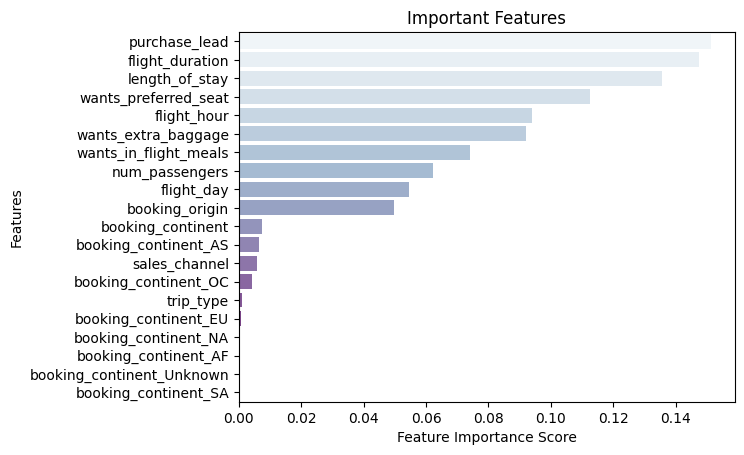

In [ ]:
#visualize feature scores of the features 
sns.barplot(x=feature_scores, y=feature_scores.index,palette='BuPu')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")